# Heart Failure Prediction Dataset
| Column name | Description |
| --- | --- |
| **Age:**| age of the patient (years)
| **Sex:**| sex of the patient (M: Male, F: Female)
| **ChestPainType:**| chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
| **RestingBP:**| resting blood pressure (mm Hg)
| **Cholesterol:**| serum cholesterol (mm/dl)
| **FastingBS:**| fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
| **RestingECG:**| resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
| **MaxHR:**| maximum heart rate achieved (Numeric value between 60 and 202)
| **ExerciseAngina:**| exercise-induced angina (Y: Yes, N: No)
| **Oldpeak:**| oldpeak = ST (Numeric value measured in depression)
| **ST_Slope:**| the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
| **HeartDisease:**| output class (1: heart disease, 0: Normal)

## Preparation
### Import libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Import data

In [68]:
data_path = "../data/heart.csv"
df = pd.read_csv(data_path)

## Inspect data
### Preview

In [69]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Columns

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Null values

In [71]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Unique values

In [72]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Summary
The dataset contains 918 rows and 12 columns. There are no null values. Columns Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, and HeartDisease are categorical.

## Descriptive statistics
### Summary statistics

In [73]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Distribution of variables
Histograms

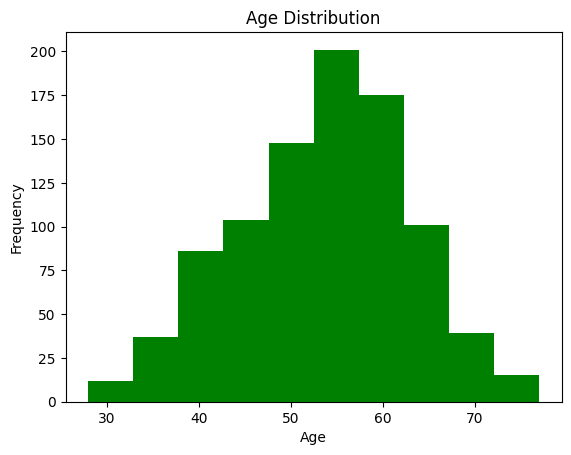

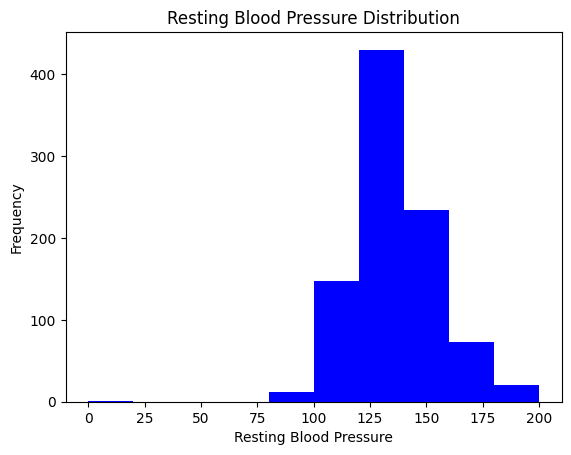

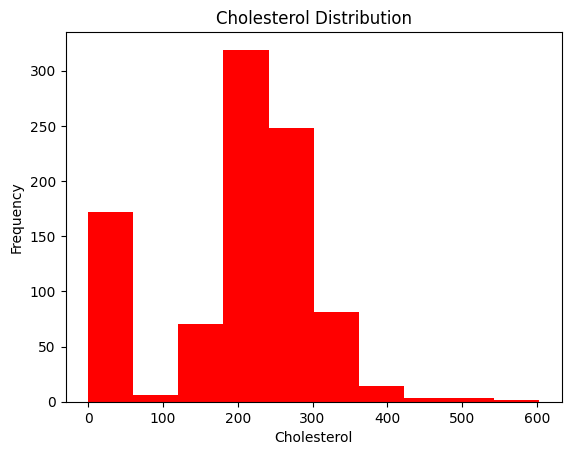

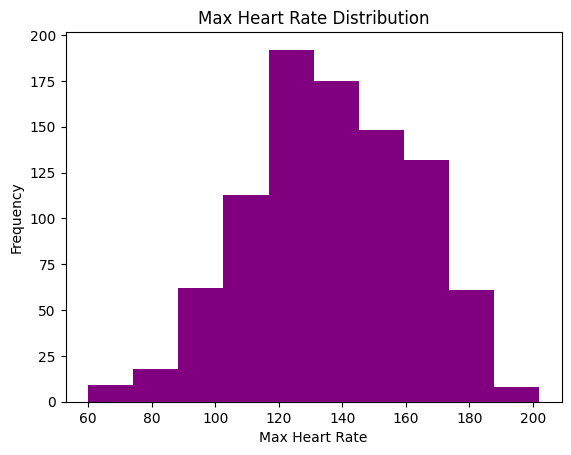

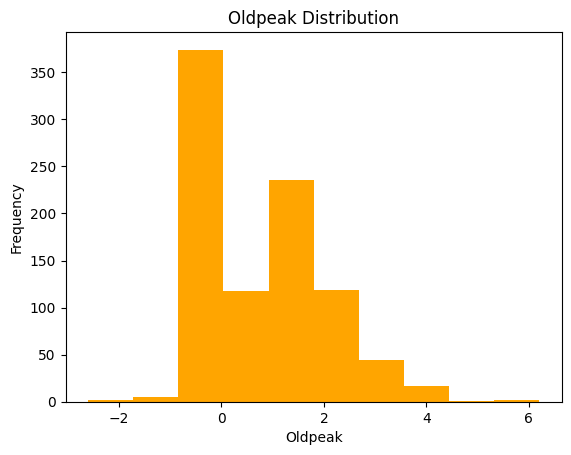

In [74]:
age = df['Age']
plt.hist(age, bins=10, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
restingBP = df['RestingBP']
plt.hist(restingBP, bins=10, color='blue')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()
cholesterol = df['Cholesterol']
plt.hist(cholesterol, bins=10, color='red')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()
maxHR = df['MaxHR']
plt.hist(maxHR, bins=10, color='purple')
plt.title('Max Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()
oldpeak = df['Oldpeak']
plt.hist(oldpeak, bins=10, color='orange')
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

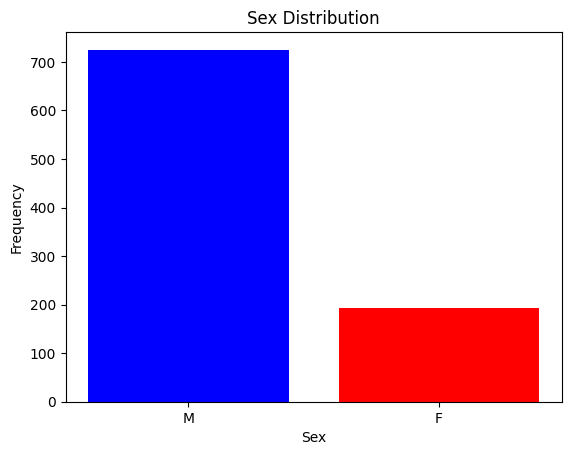

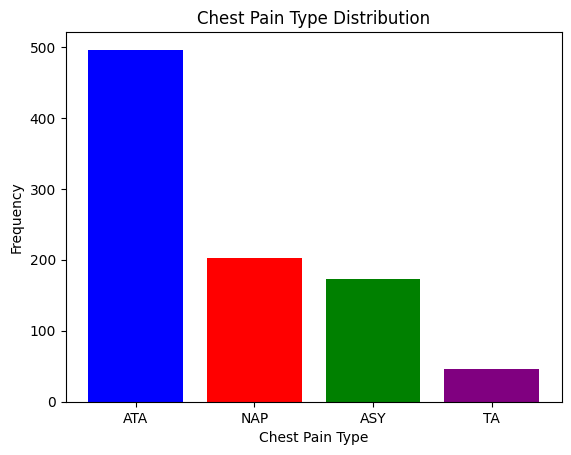

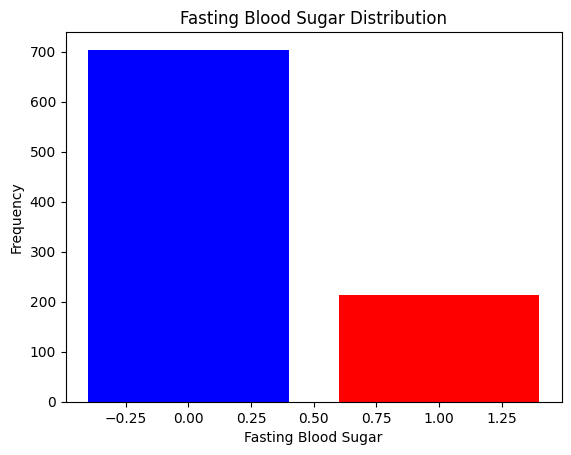

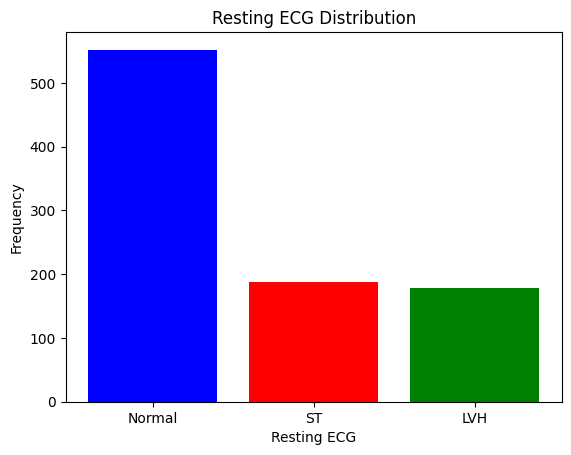

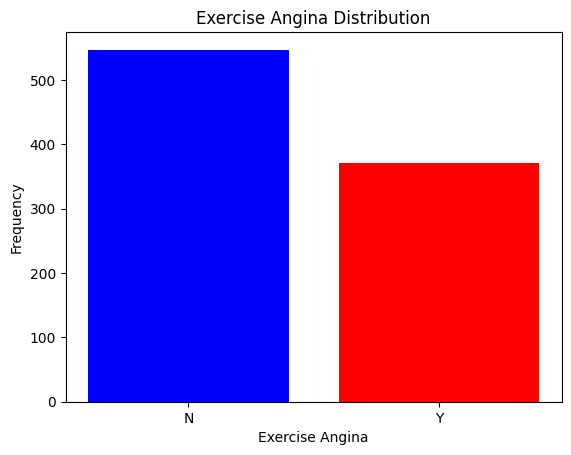

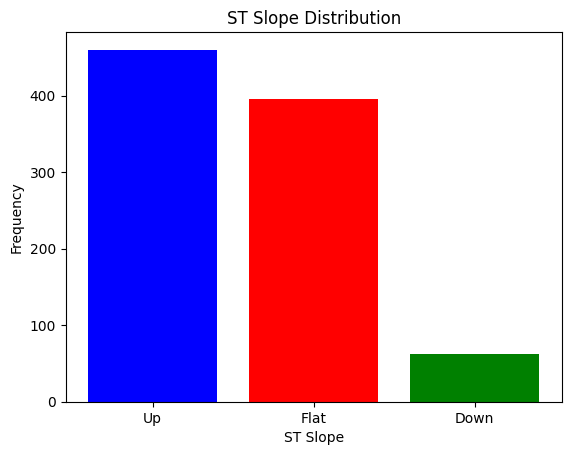

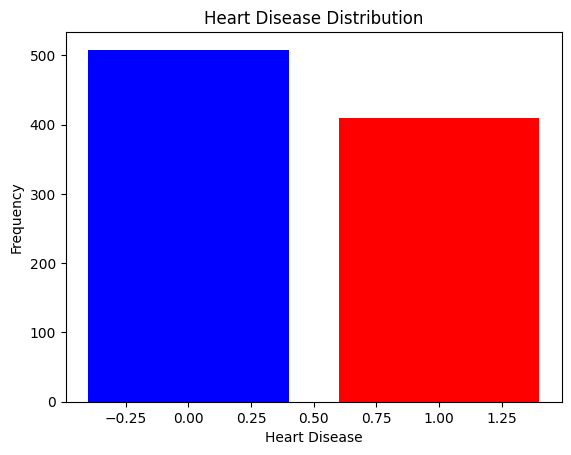

In [75]:
sex = df["Sex"]
plt.bar(sex.unique(), sex.value_counts(), color=['blue', 'red'])
plt.title('Sex Distribution')
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()
chestPainType = df["ChestPainType"]
plt.bar(chestPainType.unique(), chestPainType.value_counts(), color=['blue', 'red', 'green', 'purple'])
plt.title('Chest Pain Type Distribution')
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.show()
fastingBS = df["FastingBS"]
plt.bar(fastingBS.unique(), fastingBS.value_counts(), color=['blue', 'red'])
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Frequency")
plt.show()
restingECG = df["RestingECG"]
plt.bar(restingECG.unique(), restingECG.value_counts(), color=['blue', 'red', 'green'])
plt.title('Resting ECG Distribution')
plt.xlabel("Resting ECG")
plt.ylabel("Frequency")
plt.show()
exerciseAngina = df["ExerciseAngina"]
plt.bar(exerciseAngina.unique(), exerciseAngina.value_counts(), color=['blue', 'red'])
plt.title('Exercise Angina Distribution')
plt.xlabel("Exercise Angina")
plt.ylabel("Frequency")
plt.show()
stSlope = df["ST_Slope"]
plt.bar(stSlope.unique(), stSlope.value_counts(), color=['blue', 'red', 'green'])
plt.title('ST Slope Distribution')
plt.xlabel("ST Slope")
plt.ylabel("Frequency")
plt.show()
heartDisease = df["HeartDisease"]
plt.bar(heartDisease.unique(), heartDisease.value_counts(), color=['blue', 'red'])
plt.title('Heart Disease Distribution')
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.show()

Boxplots

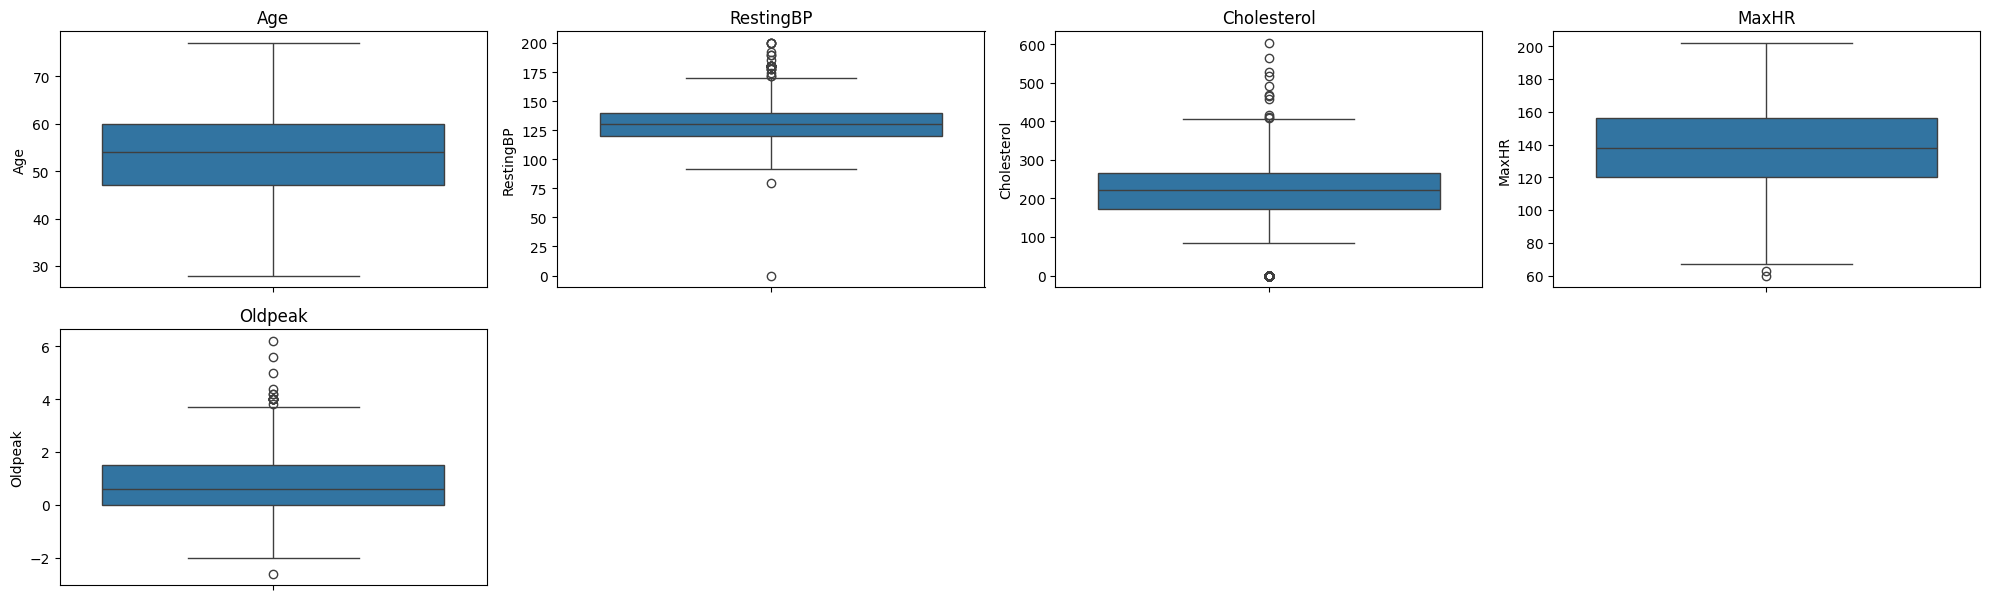

In [76]:
#Boxplots
boxplot_cols = df.select_dtypes(exclude=['object']).columns.to_list()
boxplot_cols.remove('HeartDisease')
boxplot_cols.remove('FastingBS')
plt.figure(figsize=(20, 15))
for i, col in enumerate(boxplot_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Correlation matrix

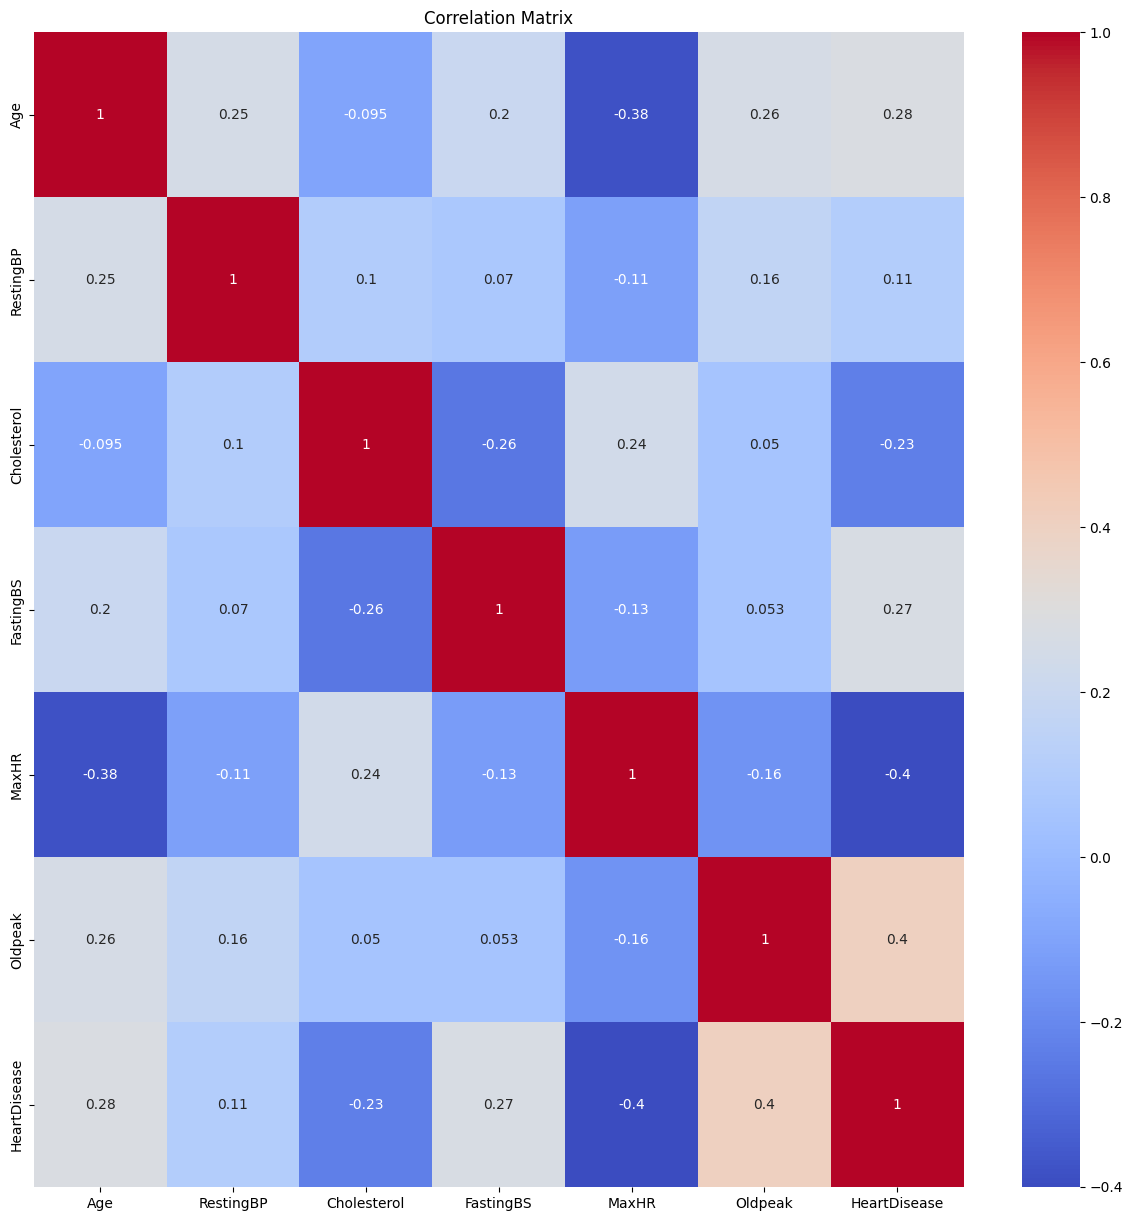

In [77]:
corr = df[df.select_dtypes(exclude=['object']).columns].corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing

### Encoding categorical variables

In [78]:
df["Sex"] = df["Sex"].map({'M': 1, 'F': 0})
df["ExerciseAngina"] = df["ExerciseAngina"].map({'Y': 1, 'N': 0})

df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


Used one-hot encoding to convert categorical variables into numerical format.

### Feature scaling and splitting

In [81]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop(columns='HeartDisease', axis=1)
y = df['HeartDisease']

Scaled the features using MinMaxScaler and split the data into training and testing sets.

### Split into training and testing sets

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


## Decision tree classifier

In [85]:
dt_model = DecisionTreeClassifier(random_state=23)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

### Evaluation
Confusion matrix

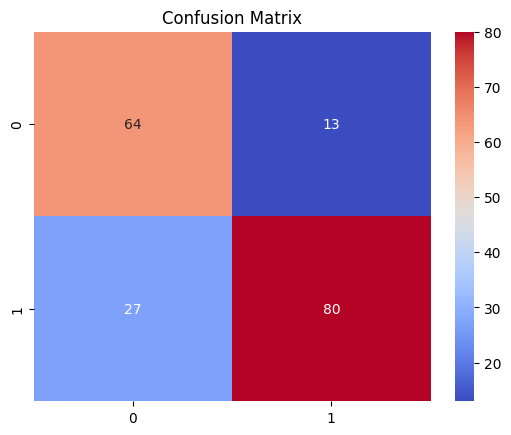

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

Classification report

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



### Visualization

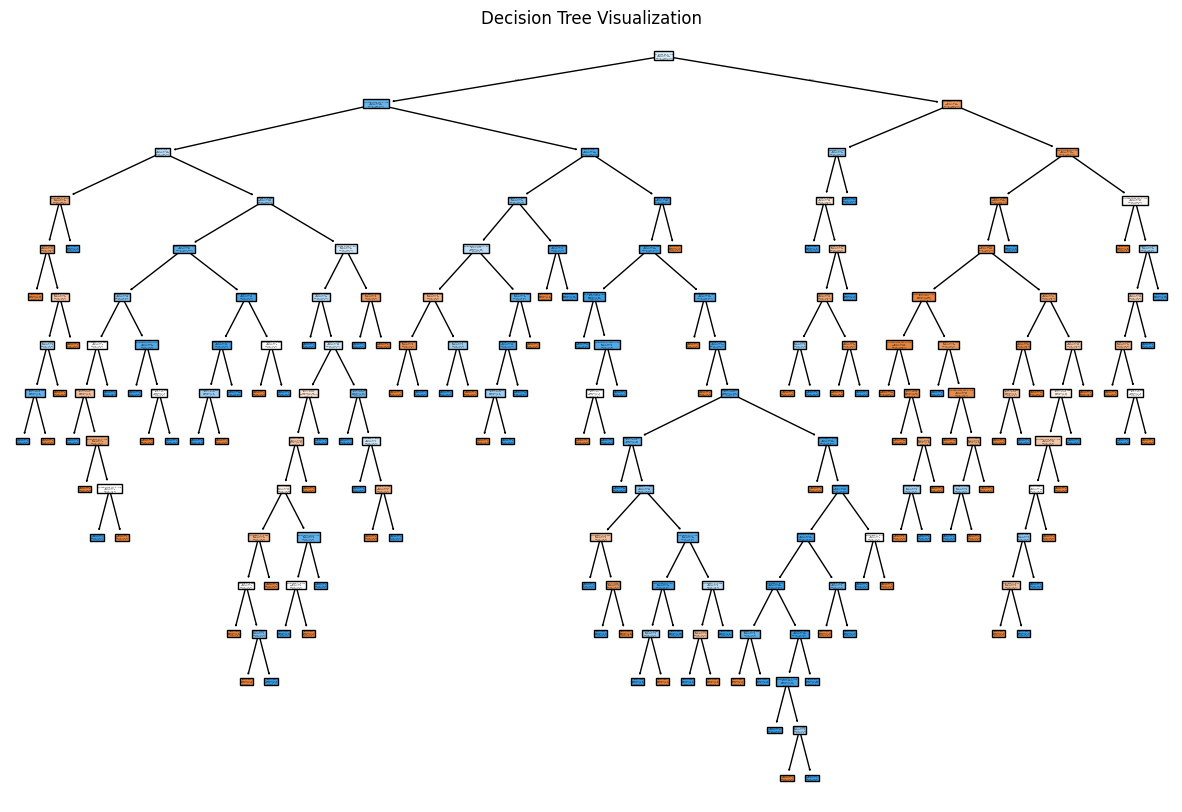

In [90]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in dt_model.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Conclusion
We can see that the model has an accuracy of 78%. The precision, recall, and F1-score for class 0 are 70%, 83%, and 76%, respectively. For class 1, the precision, recall, and F1-score are 86%, 75%, and 80%, respectively.

For this task, I decided to focus on the model's accuracy.


## Random forest classifier

In [91]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=23)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)